# DATA SCIENCE AND BUSINESS ANALYTICS INTERNSHIP at SPARKS FOUNDATION
# GRIP MAY 2021

# Author : Mahesh Palaskar

# TASK 1: Prediction using Supervised ML 

## To predict the score of a student who studies for 9.25 hrs/ day

In [2]:
#importing libreries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [4]:
#importing dataset
data=pd.read_csv("http://bit.ly/w-data")


In [5]:
# printing first 5 rows of dataframe
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [12]:
#describing dataset statistical details
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [13]:
data.shape

(25, 2)

In [14]:
data.dtypes # datatypes of columns

Hours     float64
Scores      int64
dtype: object

In [17]:
# checking if there are any null values
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

### there are no null values in the dataset

# Data Visualization using scatter plot

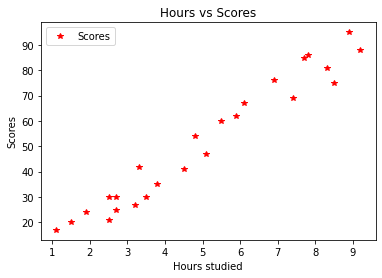

In [23]:
data.plot(x='Hours',y='Scores',style='*',color='red')
plt.title("Hours vs Scores")
plt.xlabel('Hours studied')
plt.ylabel('Scores')
plt.show()

### we can see from the diagram that there is a linear relation between the no of hours studied and scores obtained


## preparing data for training model

In [42]:
X=data.drop('Scores',axis=1)
Y=data['Scores']
X

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5
5,1.5
6,9.2
7,5.5
8,8.3
9,2.7


In [41]:
Y

0     21
1     47
2     27
3     75
4     30
5     20
6     88
7     60
8     81
9     25
10    85
11    62
12    41
13    42
14    17
15    95
16    30
17    24
18    67
19    69
20    30
21    54
22    35
23    76
24    86
Name: Scores, dtype: int64

# Splitting the data into training and test set¶

In [46]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size = 0.25, random_state = 2)


In [47]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(18, 1)
(18,)
(7, 1)
(7,)


## creating and training linear regression model

In [48]:
linreg=LinearRegression()
linreg.fit(X_train,Y_train)

LinearRegression()

In [51]:
# prediction
y_pred=linreg.predict(X_test)
y_pred

array([11.83450607, 26.23850122, 20.06536044, 95.17190655, 71.50820024,
       28.29621481, 87.96990898])

# training and test scores

In [52]:
print('Training Score : ', linreg.score(X_train, Y_train))
print('Test Score : ', linreg.score(X_test, Y_test))

Training Score :  0.9510642620413721
Test Score :  0.9456536786570634


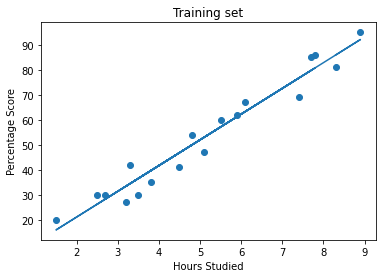

In [58]:
# Visualising the Training dataset 
plt.scatter(X_train,Y_train)
plt.title('Training set')  
plt.plot(X_train,linreg.predict(X_train))
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
plt.show()

In [55]:
df=pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})
df

,Actual,Predicted
14,17,11.834506
0,21,26.238501
17,24,20.065360
6,88,95.171907
23,76,71.508200
9,25,28.296215
3,75,87.969909


# Training data Scores vs Predicted Scores

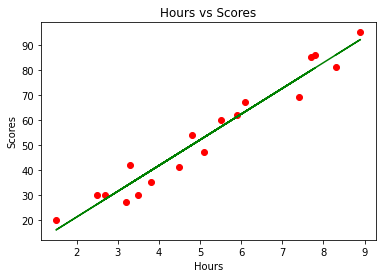

In [64]:
plt.scatter(X_train, Y_train, color = 'red')
plt.plot(X_train, linreg.predict(X_train), color = 'green')
plt.title('Hours vs Scores')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

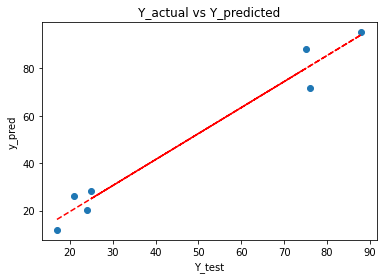

In [69]:
# relation between actual scores and predicted scores
plt.scatter(Y_test,y_pred)
plt.title('Y_actual vs Y_predicted')
plt.xlabel('Y_test')
plt.ylabel('y_pred')
z = np.polyfit(Y_test, y_pred, 1)
p = np.poly1d(z)
plt.plot(Y_test,p(Y_test),"r--")
plt.show()
plt.show()

# If a student study for 9.25hrs/day what will be the predicted score

In [71]:
study_hours = 9.25
score_pred = linreg.predict([[study_hours]])
print("Number of hours studied = {}".format(study_hours))
print("Predicted score= {}".format(score_pred[0]))

Number of hours studied = 9.25
Predicted score= 95.68633494543232


# Evaluation of the Model

# Accuracy score

In [74]:
print("accuracy_score",linreg.score(X_test, Y_test)) 

accuracy_score 0.9456536786570634


# mean absolute error

In [75]:
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(Y_test, y_pred))

Mean Absolute Error: 6.038352113472347


# Root Mean Square Error

In [76]:
print('Root mean square error : ', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

Root mean square error :  6.764420474331483


# This is how task 1 is completed

# Thank You